In [1]:
import numpy as np
import pylab as pb
import GPy
import copy as cp

import pickle

pb.ion()

#file_base = "modularized_v5_backup/"
file_base = ""
emu_vlabel = "h1"

In [7]:
# In this cell, assign m to some serially-loaded trained GPy
# emulator
m = pickle.load(open("analyses/massless_emulator_" + emu_vlabel + ".cle", "rb"))

In [3]:
#X_raw = np.load(file_base + "hc_massless_test_actual.npy",
#    allow_pickle=True)
#Y_raw = np.load(file_base + "samples_massless_test.npy",
#    allow_pickle=True)

X_raw = np.load(file_base + "hc_backup_i749_h1_unit_train.npy",
                allow_pickle=True)
Y_raw = np.load(file_base + "samples_backup_i749_h1_unit_train.npy",
                allow_pickle=True)

In [4]:
scales = np.load("standard_k.npy", allow_pickle=True)

In [5]:
def is_bad(row):
    if float('-inf') in row or float('inf') in row \
        or None in row or True in np.isnan(pspec) \
        or 0 in row:
        return True
    return False

bad_row_indices = []
for i in range(len(Y_raw)):
    pspec = Y_raw[i]
    if is_bad(pspec):
        bad_row_indices.append(i)

X = np.delete(X_raw, bad_row_indices, 0)
Y = np.delete(Y_raw, bad_row_indices, 0)

In [8]:
def inverse_ytransform(raw_prediction):
    return np.exp(raw_prediction * m.ystdev + m.ymu)

In [9]:
def nest(array):
    return np.array([np.array(array)])

In [10]:
preds = np.zeros(Y.shape)
rel_errors = np.zeros(Y.shape)

for i in range(len(X)):
    x = nest(X[i])
    raw_pred, _ = m.predict(x)
    preds[i] = inverse_ytransform(raw_pred)
    rel_errors[i] = (preds[i] - Y[i]) / Y[i]

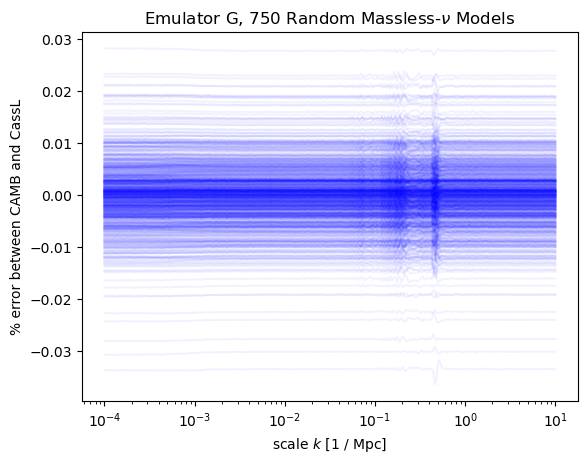

In [15]:
for i in range(len(rel_errors)):
    if i % 1 == 0: # plot one out of every one hundred errors
        pb.plot(scales, 100 * rel_errors[i],
            color='blue', alpha=0.05)
        pb.xscale('log')
        
pb.title(r"Emulator G, " + str(len(rel_errors)) + \
         r" Random Massless-$\nu$ Models")
pb.ylabel("% error between CAMB and CassL")
pb.xlabel("scale $k$ [1 / Mpc]")
pb.savefig("../plots/emulator/performance/massless_5k.png")

In [18]:
# Error statistics ideas: parentheticals describe building blocks

# (for each curve:)
    # a minimum percent error
    # b maximum percent error
    # c standard deviation of errors
    # d mean error
    # e median error

# Median, mean, stddev of a-e.

mins = np.array([min(abs(rel_error_curve)) for rel_error_curve in rel_errors])
print("MINIMUM RELATIVE ERRORS:")
print("this ranges from", min(mins), "to", max(mins))
print("median is", np.median(mins))
print("mean is", np.mean(mins))
print("st.dev. is", np.std(mins))

MINIMUM RELATIVE ERRORS:
this ranges from 1.4281895273927658e-11 to 0.00031738295701742717
median is 2.6693177569088272e-05
mean is 4.131923098417575e-05
st.dev. is 4.4611905159966095e-05


In [19]:
maxs = np.array([max(abs(rel_error_curve)) for rel_error_curve in rel_errors])
print("MAXIMUM RELATIVE ERRORS:")
print("this ranges from", min(maxs), "to", max(maxs))
print("median is", np.median(maxs))
print("mean is", np.mean(maxs))
print("st.dev. is", np.std(maxs))

MAXIMUM RELATIVE ERRORS:
this ranges from 1.3037272050869244e-06 to 0.00036395050817638583
median is 3.8501604084210554e-05
mean is 5.2849062325092436e-05
st.dev. is 4.740647105402103e-05


In [20]:
means = np.array([np.mean(rel_error_curve) for rel_error_curve in rel_errors])
print("MEAN RELATIVE ERRORS:")
print("this ranges from", min(means), "to", max(means))
print("median is", np.median(means))
print("mean is", np.mean(means))
print("st.dev. is", np.std(means))

MEAN RELATIVE ERRORS:
this ranges from -0.00033519024067289803 to 0.00027853061682607376
median is 5.267037141557729e-07
mean is 7.8003294192716e-09
st.dev. is 6.587633530709091e-05


In [21]:
meds = np.array([np.median(rel_error_curve) for rel_error_curve in rel_errors])
print("MEDIAN RELATIVE ERRORS:")
print("this ranges from", min(meds), "to", max(meds))
print("median is", np.median(meds))
print("mean is", np.mean(meds))
print("st.dev. is", np.std(meds))

MEDIAN RELATIVE ERRORS:
this ranges from -0.0003348276246813057 to 0.000277904730965459
median is 4.853645363490194e-07
mean is 1.8749572691769205e-09
st.dev. is 6.578349730761175e-05


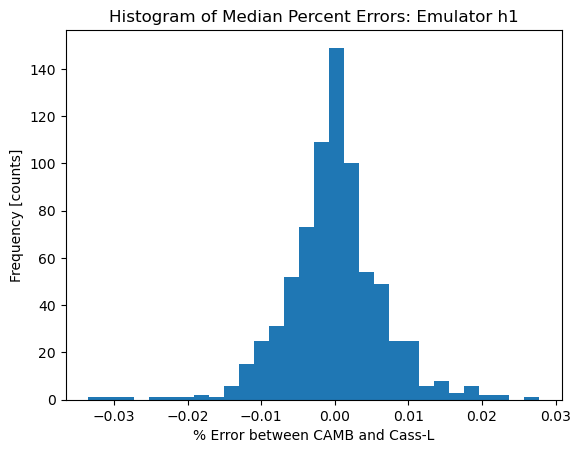

In [23]:
pb.hist(100 * meds, bins=30)
pb.title("Histogram of Median Percent Errors: Emulator " + emu_vlabel)
pb.ylabel("Frequency [counts]")
pb.xlabel("% Error between CAMB and Cass-L")
pb.savefig("../plots/emulator/performance/err_hist_" + emu_vlabel + ".png")

In [24]:
stddevs = np.array([np.std(rel_error_curve) for rel_error_curve in rel_errors])
print("ST.DEV.S IN RELATIVE ERRORS:")
print("this ranges from", min(stddevs), "to", max(stddevs))
print("median is", np.median(stddevs))
print("mean is", np.mean(stddevs))
print("st.dev. is", np.std(stddevs))

ST.DEV.S IN RELATIVE ERRORS:
this ranges from 2.2396695766145598e-07 to 4.574052130102539e-06
median is 9.641412836908017e-07
mean is 1.140413302009579e-06
st.dev. is 7.198905724050228e-07
